# Decorators

    Decorators modify the behaviour of any function
        input function
        output function -> wrapper

In [ ]:
def welcome(func):
    def wrapper(*args, **kwargs):
        print("Welcome User")
        res = func(*args, **kwargs)
        print(f"Function result = {res}")
        print("Thank You")
        return res

    return wrapper

In [4]:
import math


@welcome
def hypotenuse(a: float, b: float) -> float:
    return math.sqrt(a**2 + b**2)


a = 3
b = 4

c = hypotenuse(a, b)
c

Welcome User
Function result = 5.0
Thank You


5.0

In [6]:
@welcome
def simple_interest(p: float, n: float, r: float) -> tuple[float, float]:
    i = (p * n * r) / 100
    a = p + i
    return i, a


p = 10000
n = 3
r = 3

i, a = simple_interest(p, n, r)

p = 100000
n = 6
r = 5

i, a = simple_interest(p, n, r)

Welcome User
Function result = (900.0, 10900.0)
Thank You
Welcome User
Function result = (30000.0, 130000.0)
Thank You


In [30]:
import time


def measure_time(func):
    def wrapper(*args, **kwargs):
        # Start timer for calculating method performance
        start = time.perf_counter()
        res = func(*args, **kwargs)
        print(f"Results = {res}")
        # Stop Timer for calculating method performance
        stop = time.perf_counter()
        # Time required for executing method
        elapsed = stop - start
        print(f"Method took {elapsed:.2f} seconds ")
        return res

    return wrapper

In [32]:
@measure_time
def simple_interest(p: float, n: float, r: float) -> tuple[float, float]:
    i = (p * n * r) / 100
    a = p + i
    return i, a


p = 10000
n = 3
r = 3

i, a = simple_interest(p, n, r)


@measure_time
def square(a: float) -> float:
    time.sleep(2)
    return a**2


b = 3
res = square(b)

Results = (900.0, 10900.0)
Method took 0.00 seconds 
Results = 9
Method took 2.00 seconds 


In [39]:
url = "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/refs/heads/main/artifacts/data.csv"
print(url)

from urllib.request import urlretrieve


@measure_time
def downloaded_file(url: str) -> str:
    file_name = url.split("/")[-1]
    print(f"File Name: {file_name}")
    urlretrieve(url, file_name)
    print(f"URL: {url}")


downloaded_file(url)

import pandas as pd

df = pd.read_csv("data.csv")
df

https://raw.githubusercontent.com/utkarshg1/mlproject_regression/refs/heads/main/artifacts/data.csv
File Name: data.csv
URL: https://raw.githubusercontent.com/utkarshg1/mlproject_regression/refs/heads/main/artifacts/data.csv
Results = None
Method took 15.79 seconds 


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [43]:
df.columns, df.shape
df.info

<bound method DataFrame.info of             id  carat        cut color clarity  depth  table     x     y  \
0            0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33   
1            1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12   
2            2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73   
3            3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41   
4            4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61   
...        ...    ...        ...   ...     ...    ...    ...   ...   ...   
193568  193568   0.31      Ideal     D    VVS2   61.1   56.0  4.35  4.39   
193569  193569   0.70    Premium     G    VVS2   60.3   58.0  5.75  5.77   
193570  193570   0.73  Very Good     F     SI1   63.1   57.0  5.72  5.75   
193571  193571   0.34  Very Good     D     SI1   62.9   55.0  4.45  4.49   
193572  193572   0.71       Good     E     SI2   60.8   64.0  5.73  5.71   

           z  price  
0       4.55  13619  
1       5.0

In [45]:
df.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
id,193573.0,96786.000000,55879.856166,0.0,48393.00,96786.00,145179.00,193572.00
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [46]:
df.describe(include="object").T

,count,unique,top,freq
cut,193573,5,Ideal,92454
color,193573,7,G,44391
clarity,193573,8,SI1,53272


In [47]:
a = (
    df.groupby("color")
    .agg({"price": "mean"})
    .sort_values(by="price", ascending=False)
    .round(2)
)
a

,price
color,
J,5756.31
I,5523.76
H,4776.55
G,4113.44
F,3652.35
E,2991.45
D,2976.19


<Axes: xlabel='color'>

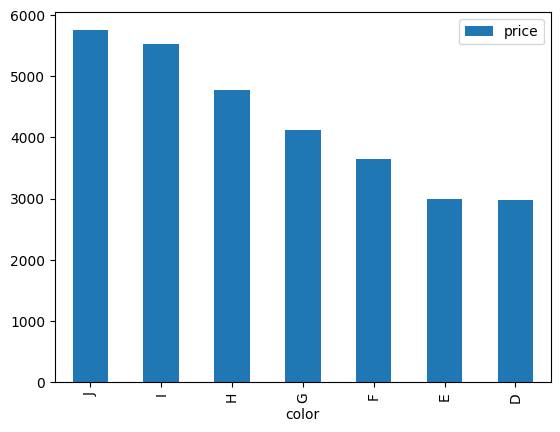

In [48]:
a.plot(kind="bar")